
#  <img src="jupyter.svg" style="background:none; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="25%" height="25%"> Notebooks

* Previously known as "IPython notebooks"

# What's good about notebooks?

* They can run any Python (or increasingly, other languages) that you want
* They are "rich" documents (I.e., they include LaTeX, plots, sounds, animations, etc.)
* They are easily shared (just put them on github or anywhere else on the internet)
* They are easy to maintain (they are just JSON files, no fancy database or anything required)

Or in short:

## They make science easier and more reproducible

Compare this:
https://gist.github.com/eteq/7b54c9cc1cb23cfe9a1ad1afd70bea9f

To this:
https://github.com/eteq/piscdwarfs_hst/blob/master/Calibed%20Photometry.ipynb

# How do you use them?

(Start ``jupyter notebook`` from wherever all your stuff is for a project)

Create a notebook, and start typing Python code:

In [ ]:
from astropy import coordinates

coordinates.SkyCoord.from_name('M31')

Hit shift-enter (or control-enter)

In [1]:
from astropy import coordinates

coordinates.SkyCoord.from_name('M82')

<SkyCoord (ICRS): (ra, dec) in deg
    (148.9684583, 69.6797028)>

## Some Tips

Pay attention to the color of the box around the cell: green means "edit" mode (typing will edit the code), blue means "Command Mode" (typing will move/insert/execute cells).

Try the "multi select" mode (hold down cmd or ctrl while clicking on different parts of text in a cell) - every keystroke goes to *all* of the cursors.

Use ``?`` to get help on a function - it appears in a pop-up bar at the bottom of the notebook

Check out the ``%magic`` list: lots of useful productivity tools (from IPython)

To learn more, open a notebook and go to "Help"->"User interface tour" or "Help"->"Keyboard Shortcuts"

# Some neat things you can do with notebooks

## Make plots

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

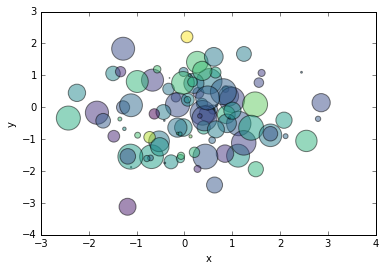

In [3]:
plt.scatter(*np.random.randn(2, 100), 
            s=np.pi * (15 * np.random.rand(100))**2 , 
            c=np.random.randn(100), alpha=0.5,
            cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

## Render LaTeX

```
$M(r) = - \frac{r \sigma^2}{G} 
          \left[ \frac{d \ln \nu}{d \ln r} + 
                 \frac{d \ln \sigma^2}{d \ln r} + 
                  2 \beta(r)
          \right]$
 ```

$M(r) = - \frac{r \sigma^2}{G} 
          \left[ \frac{d \ln \nu}{d \ln r} + 
                 \frac{d \ln \sigma^2}{d \ln r} + 
                  2 \beta(r)
          \right]$

## Embed images

In [4]:
from IPython import display

urltempl = ("http://skyservice.pha.jhu.edu/dr12/ImgCutout/getjpeg.aspx?"
            "ra={coo.ra.deg}&dec={coo.dec.deg}&width={width}&height={height}&scale={scale}")
m101 = coordinates.SkyCoord.from_name('M101')
display.Image(url=urltempl.format(coo=m101, width=1024, height=768, scale=1.25))

## Test/time your code

In [5]:
%timeit np.sqrt(12)

The slowest run took 14.82 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.07 µs per loop


In [6]:
%timeit 12**0.5

10000000 loops, best of 3: 22.4 ns per loop


## Show animations

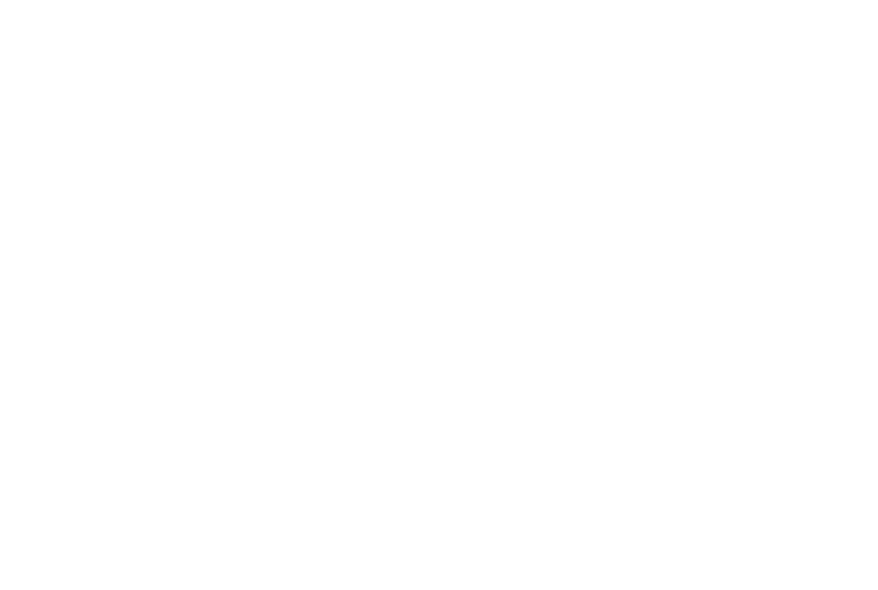

In [7]:
# adapted from https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rcParams

rcParams['animation.html'] = 'html5'

N_trajectories = 20


def lorenz_deriv(xyz, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = np.sort(-15 + 30 * np.random.random((N_trajectories, 3)))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
lorenz_fig = plt.figure(figsize=(12, 8))
ax = lorenz_fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.summer(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def lorenz_init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def lorenz_animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    lorenz_fig.canvas.draw()
    return lines + pts

In [8]:
from matplotlib import animation
# Details of this one's implementation are in a hidden slide
animation.FuncAnimation(lorenz_fig, func=lorenz_animate, 
                        init_func=lorenz_init, blit=True,
                        frames=500, interval=30)

## Make presentations

The one you're seeing here! That is, you can see this notebook at http://spacetelescope.github.io/pylunch/3-numpy/Notebooks.slides.html